In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline


In [2]:
from keras.layers import Dense, Activation, Dropout, Reshape, Permute

In [3]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import random as rn
import numpy as np
np.random.seed(1)
rn.seed(3)
import tensorflow
tensorflow.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
#from keras.layers.core import Dense, from keras.layers import Dense, Activation, Dropout, Reshape, Permute
#from keras.layers.recurrent import SimpleRNN


In [4]:
from keras.layers import SimpleRNN
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt
import datetime as dt
plt.style.use('ggplot')
import DatastreamDSWS as DSWS
import pyodbc

In [5]:
#pip install pyodbc

In [134]:
Data_R1=pd.read_csv("refinitiv_out_old.csv")
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])
Data_R1["Date"]=Data_R1["Date"].dt.date
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])


Data_R2=pd.read_csv("refinitiv_out1.csv")
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])
Data_R2["Date"]=Data_R2["Date"].dt.date
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])

Data_P1=pd.read_csv("platts_1.csv")

Data_P1["Date"]=Data_P1["assessDate"]

Data_P1.drop("assessDate",axis=1,inplace=True)

Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])
Data_P1["Date"]=Data_P1["Date"].dt.date


Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])

Data_P2=pd.read_csv("platts.csv")

Data_P2["Date"]=Data_P2["assessDate"]

Data_P2.drop("assessDate",axis=1,inplace=True)

Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])
Data_P2["Date"]=Data_P2["Date"].dt.date
Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])

Data_P2["Date"].dtype

Data_P3=pd.read_csv("platts_new.csv")

Data_P3["Date"]=Data_P3["assessDate"]

Data_P3.drop("assessDate",axis=1,inplace=True)


Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])
Data_P3["Date"]=Data_P3["Date"].dt.date
Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])

Data_A=pd.read_csv("argus_data.csv")
Data_A["Date"]=pd.to_datetime(Data_A["Date"])
Data_A["Date"]=Data_A["Date"].dt.date
Data_A["Date"]=pd.to_datetime(Data_A["Date"])

Data_A["Date"]

Data_A2=pd.read_csv("Argus_New_Data.csv")
Data_A2.rename(columns={"PUBLICATION_DATE":"Date"},inplace=True)

Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])
Data_A2["Date"]=Data_A2["Date"].dt.date
Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])

Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)
Data_x=pd.concat([Data_2,Data_1,Data_3],axis=0)
Data_x=Data_x.iloc[:,1:]
Data_x.reset_index(inplace=True)
Data_x=Data_x.drop_duplicates()


ffa= Data_x.loc[:,~Data_x.columns.duplicated()]


Data_P2= Data_P2.set_index('Date',)
Data_R1= Data_R1.set_index('Date') 
Data_P1= Data_P1.set_index('Date')
Data_P3= Data_P3.set_index('Date')
Data_R2= Data_R2.set_index('Date')
Data_A= Data_A.set_index('Date')
Data_A2= Data_A2.set_index('Date')
ffa= ffa.set_index('Date')

Data=pd.concat([Data_P2,Data_P1,Data_P3,Data_R1,Data_R2,Data_A,Data_A2,ffa],axis=1)

Data.reset_index(inplace=True)



In [135]:
Data

Date  AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  \
0    2011-12-30      NaN      NaN      NaN      NaN      NaN      NaN   
1    2012-01-02      NaN      NaN      NaN      NaN      NaN      NaN   
2    2012-01-03      NaN      NaN      NaN      NaN      NaN      NaN   
3    2012-01-04      NaN      NaN      NaN      NaN      NaN      NaN   
4    2012-01-05      NaN      NaN      NaN      NaN      NaN      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
4016 2024-02-29      NaN      NaN      NaN      NaN      NaN      NaN   
4017 2024-03-01      NaN      NaN      NaN      NaN      NaN      NaN   
4018 2024-03-29      NaN      NaN      NaN      NaN      NaN      NaN   
4019 2024-06-28      NaN      NaN      NaN      NaN      NaN      NaN   
4020 2024-12-31      NaN      NaN      NaN      NaN      NaN      NaN   

      AAXJJ03  AAXJL03  AAXRQ03  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  \
0         NaN      NaN      NaN  ...       NaN       NaN       NaN   
1         NaN      NaN      NaN  ...       NaN       NaN       NaN   
2         NaN      NaN      NaN  ...       NaN       NaN       NaN   
3         NaN      NaN      NaN  ...       NaN       NaN       NaN   
4         NaN      NaN      NaN  ...       NaN       NaN       NaN   
...       ...      ...      ...  ...       ...       ...       ...   
4016      NaN      NaN      NaN  ...   16443.0   20464.0   23514.0   
4017      NaN      NaN      NaN  ...   17050.0   21121.0   24174.0   
4018      NaN      NaN      NaN  ...       NaN       NaN       NaN   
4019      NaN      NaN      NaN  ...       NaN       NaN       NaN   
4020      NaN      NaN      NaN  ...       NaN       NaN       NaN   

      5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
4016     21489.0     20350.0     19336.0     18814.0     18379.0     18300.0   
4017     22143.0     20643.0     19539.0     19021.0     18483.0     18350.0   
4018         NaN         NaN         NaN         NaN         NaN         NaN   
4019         NaN         NaN         NaN         NaN         NaN         NaN   
4020         NaN         NaN         NaN         NaN         NaN         NaN   

      5TC_C+7CAL  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4016     18250.0  
4017     18357.0  
4018         NaN  
4019         NaN  
4020         NaN  

[4021 rows x 10493 columns]

In [136]:
Data.shape

(4021, 10493)

In [137]:
Data_1 = (Data.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

In [138]:
Data_1

Date  AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  \
0    2015-01-01      NaN   52.876      NaN  110.643      NaN  23215.0   
1    2015-01-02      NaN      NaN   110.25      NaN     54.1      NaN   
2    2015-01-03      NaN      NaN      NaN      NaN      NaN      NaN   
3    2015-01-04      NaN      NaN      NaN      NaN      NaN      NaN   
4    2015-01-05      NaN      NaN   110.50      NaN     54.5      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
3264 2023-12-09      NaN      NaN      NaN      NaN      NaN      NaN   
3265 2023-12-10      NaN      NaN      NaN      NaN      NaN      NaN   
3266 2023-12-11     3.27      NaN   275.00      NaN     92.8      NaN   
3267 2023-12-12     3.32      NaN   277.00      NaN     91.5      NaN   
3268 2023-12-13     3.37      NaN   277.00      NaN     86.4      NaN   

      AAXJJ03  AAXJL03  AAXRQ03  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  \
0      360.18   363.74    325.6  ...       NaN       NaN       NaN   
1         NaN      NaN      NaN  ...   10565.0   13007.0   14148.0   
2         NaN      NaN      NaN  ...       NaN       NaN       NaN   
3         NaN      NaN      NaN  ...       NaN       NaN       NaN   
4         NaN      NaN      NaN  ...   10228.0   12737.0   13858.0   
...       ...      ...      ...  ...       ...       ...       ...   
3264      NaN      NaN      NaN  ...       NaN       NaN       NaN   
3265      NaN      NaN      NaN  ...       NaN       NaN       NaN   
3266      NaN      NaN      NaN  ...   19625.0   11779.0   15629.0   
3267      NaN      NaN      NaN  ...   19986.0   12136.0   15971.0   
3268      NaN      NaN      NaN  ...   19714.0   11943.0   15779.0   

      5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1        13522.0     14510.0     14897.0     14929.0     15370.0     15781.0   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4        13441.0     14420.0     14867.0     14899.0     15330.0     15801.0   
...          ...         ...         ...         ...         ...         ...   
3264         NaN         NaN         NaN         NaN         NaN         NaN   
3265         NaN         NaN         NaN         NaN         NaN         NaN   
3266     16821.0     16200.0     16436.0     16443.0     16386.0     16279.0   
3267     17534.0     16554.0     16657.0     16629.0     16543.0     16421.0   
3268     17030.0     16271.0     16604.0     16604.0     16507.0     16386.0   

      5TC_C+7CAL  
0            NaN  
1        15952.0  
2            NaN  
3            NaN  
4        16042.0  
...          ...  
3264         NaN  
3265         NaN  
3266     16279.0  
3267     16400.0  
3268     16371.0  

[3269 rows x 10493 columns]

In [139]:
Data_1.set_index("Date",inplace=True)

In [140]:
Data_1=Data_1.fillna(method="ffill")

In [141]:
Data_2= Data_1.loc[:,~Data_1.columns.duplicated()]

In [142]:
Data_1=Data_1.fillna(method="ffill")

In [143]:
Data_2.shape

(3269, 9753)

In [144]:
Data_2

AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  AAXJJ03  \
Date                                                                        
2015-01-01      NaN   52.876      NaN  110.643      NaN  23215.0   360.18   
2015-01-02      NaN   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-03      NaN   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-04      NaN   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-05      NaN   52.876   110.50  110.643     54.5  23215.0   360.18   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-09     3.26   94.363   275.00  271.842     95.1  53975.0   540.69   
2023-12-10     3.26   94.363   275.00  271.842     95.1  53975.0   540.69   
2023-12-11     3.27   94.363   275.00  271.842     92.8  53975.0   540.69   
2023-12-12     3.32   94.363   277.00  271.842     91.5  53975.0   540.69   
2023-12-13     3.37   94.363   277.00  271.842     86.4  53975.0   540.69   

            AAXJL03  AAXRQ03  AAXWC03  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  \
Date                                   ...                                 
2015-01-01   363.74    325.6      NaN  ...       NaN       NaN       NaN   
2015-01-02   363.74    325.6      NaN  ...   10565.0   13007.0   14148.0   
2015-01-03   363.74    325.6      NaN  ...   10565.0   13007.0   14148.0   
2015-01-04   363.74    325.6      NaN  ...   10565.0   13007.0   14148.0   
2015-01-05   363.74    325.6      NaN  ...   10228.0   12737.0   13858.0   
...             ...      ...      ...  ...       ...       ...       ...   
2023-12-09   590.52    416.3    353.0  ...   19489.0   11643.0   15550.0   
2023-12-10   590.52    416.3    353.0  ...   19489.0   11643.0   15550.0   
2023-12-11   590.52    416.3    353.0  ...   19625.0   11779.0   15629.0   
2023-12-12   590.52    416.3    353.0  ...   19986.0   12136.0   15971.0   
2023-12-13   590.52    416.3    353.0  ...   19714.0   11943.0   15779.0   

            5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
Date                                                                     
2015-01-01         NaN         NaN         NaN         NaN         NaN   
2015-01-02     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-03     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-04     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-05     13441.0     14420.0     14867.0     14899.0     15330.0   
...                ...         ...         ...         ...         ...   
2023-12-09     16750.0     16171.0     16446.0     16450.0     16393.0   
2023-12-10     16750.0     16171.0     16446.0     16450.0     16393.0   
2023-12-11     16821.0     16200.0     16436.0     16443.0     16386.0   
2023-12-12     17534.0     16554.0     16657.0     16629.0     16543.0   
2023-12-13     17030.0     16271.0     16604.0     16604.0     16507.0   

            5TC_C+6CAL  5TC_C+7CAL  
Date                                
2015-01-01         NaN         NaN  
2015-01-02     15781.0     15952.0  
2015-01-03     15781.0     15952.0  
2015-01-04     15781.0     15952.0  
2015-01-05     15801.0     16042.0  
...                ...         ...  
2023-12-09     16307.0     16307.0  
2023-12-10     16307.0     16307.0  
2023-12-11     16279.0     16279.0  
2023-12-12     16421.0     16400.0  
2023-12-13     16386.0     16371.0  

[3269 rows x 9753 columns]

In [145]:
Data_2=Data_2.dropna(thresh=len(Data_2)-30, axis=1)

In [146]:
Data_2=Data_2.fillna(method="ffill")

In [147]:
Data_2.isnull().sum()

AAVUW03       0
AAWWR00       1
AAWWR03       0
AAXEX00       1
AAXJI03       0
             ..
5TC_C+3CAL    1
5TC_C+4CAL    1
5TC_C+5CAL    1
5TC_C+6CAL    1
5TC_C+7CAL    1
Length: 2575, dtype: int64

In [148]:
Tar=pd.read_excel("Copy of BCI - C5TC.xlsx")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)

Target

Value
Date               
2015-01-01      NaN
2015-01-02   4884.0
2015-01-03   4884.0
2015-01-04   4884.0
2015-01-05   4829.0
...             ...
2023-12-09  35320.0
2023-12-10  35320.0
2023-12-11  36475.0
2023-12-12  38082.0
2023-12-13  35711.0

[3269 rows x 1 columns]

In [149]:
# Target["shift_15"]=Target["Value"].shift(-15)

In [150]:
Data_Fin=pd.concat([Target['Value'],Data_2],axis=1)

In [151]:
Data_Fin=Data_Fin.fillna(method="ffill")


In [152]:
# Data_Fin.to_csv("Data_Fin.csv")

In [153]:
Data_Fin=Data_Fin.iloc[1:,:]

In [154]:
Data_Fin=Data_Fin.resample("W-SUN").mean()

In [155]:
Data_Fin.head()

Value  AAVUW03     AAWWR00     AAWWR03    AAXEX00  \
Date                                                                  
2015-01-04  4884.000000   52.876  110.250000  110.643000  54.100000   
2015-01-11  4743.428571   52.876  110.392857  110.643000  53.671429   
2015-01-18  6783.000000   52.876  110.785714  110.643000  52.292857   
2015-01-25  8204.142857   52.876  110.500000  110.643000  53.435714   
2015-02-01  7134.857143   53.033  111.000000  110.556571  54.085714   

                 AAXJI03     AAXJJ03     AAXJL03     AAXRQ03     AISID04  ...  \
Date                                                                      ...   
2015-01-04  23215.000000  360.180000  363.740000  325.600000  234.000000  ...   
2015-01-11  23215.000000  360.180000  363.740000  325.600000  235.428571  ...   
2015-01-18  23215.000000  360.180000  363.740000  325.600000  238.142857  ...   
2015-01-25  23215.000000  360.180000  363.740000  325.600000  236.000000  ...   
2015-02-01  23475.357143  364.275714  368.172857  318.818571  233.142857  ...   

                5TC_C+4Q      5TC_C+5Q      5TC_C+6Q    5TC_C+1CAL  \
Date                                                                 
2015-01-04  10565.000000  13007.000000  14148.000000  13522.000000   
2015-01-11   9820.428571  12235.142857  13607.000000  13004.285714   
2015-01-18  10362.142857  12580.428571  14120.142857  13283.285714   
2015-01-25  10154.000000  12386.142857  13859.857143  13003.142857   
2015-02-01   9509.285714  11883.428571  13419.857143  12541.571429   

              5TC_C+2CAL    5TC_C+3CAL    5TC_C+4CAL    5TC_C+5CAL  \
Date                                                                 
2015-01-04  14510.000000  14897.000000  14929.000000  15370.000000   
2015-01-11  14146.857143  14761.571429  14969.142857  15181.428571   
2015-01-18  14228.857143  15021.857143  15178.857143  15347.000000   
2015-01-25  14160.285714  15116.571429  15335.428571  15478.571429   
2015-02-01  13962.857143  15083.000000  15344.000000  15527.142857   

              5TC_C+6CAL    5TC_C+7CAL  
Date                                    
2015-01-04  15781.000000  15952.000000  
2015-01-11  15653.714286  15906.000000  
2015-01-18  15705.714286  15998.142857  
2015-01-25  15761.428571  16032.428571  
2015-02-01  15844.285714  16072.428571  

[5 rows x 2576 columns]

In [156]:
cor={}
for i in range(len(Data_Fin.columns)):   
    cor[Data_Fin.columns[i]]=Data_Fin["Value"].corr(Data_Fin.iloc[:,i])

Imp_f= {k:v for k,v in cor.items() if abs(v)>.75}
len(Imp_f)

85

In [157]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [158]:
Data_F = Data_Fin[keys]

In [159]:
Data_F=Data_F.dropna()

In [160]:
Data_F.iloc[1:,:].isnull().sum()

Value          0
CIBCR00        0
CIBCR03        0
CIGAJ00        0
CIGAJ03        0
              ..
13667          0
5TC_CCURMON    0
5TC_C+1MON     0
5TC_C+2MON     0
5TC_CCURQ      0
Length: 85, dtype: int64

In [161]:
series=Data_F.iloc[1:,:]
train_data = series.iloc[:int(len(series)*0.75),1:].dropna()
val_data = series.iloc[int(len(series)*0.75):int(len(series)*0.9),1:].dropna()
test_data = series.iloc[int(len(series)*0.9):int(len(series)*1),1:].dropna()

In [162]:
n_past = 15
n_days_for_prediction=90
train_data = series.iloc[:int(len(series)*0.75),1:].dropna()
val_data = series.iloc[int(len(series)*0.75):int(len(series)*0.9),1:].dropna()
test_data = series.iloc[int(len(series)*0.9):int(len(series)*1),1:].dropna()
y_train_data = series.iloc[:int(len(series)*0.75),0].dropna()
y_val_data = series.iloc[int(len(series)*0.75):int(len(series)*0.9),0].dropna()
y_test_data = series.iloc[int(len(series)*0.9):int(len(series)*1),0].dropna()
        
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(pd.to_datetime(test_data.index))[-n_past], periods=n_days_for_prediction).tolist()
        
print(y_train_data.shape,val_data.shape,test_data.shape)

(350,) (70, 84) (47, 84)


In [163]:
series.iloc[:int(len(series)*0.75),0]

Date
2015-01-11     4743.428571
2015-01-18     6783.000000
2015-01-25     8204.142857
2015-02-01     7134.857143
2015-02-08     6672.000000
                  ...     
2021-08-22    46047.857143
2021-08-29    50893.142857
2021-09-05    47789.000000
2021-09-12    43838.571429
2021-09-19    53140.285714
Freq: W-SUN, Name: Value, Length: 350, dtype: float64

In [164]:
y_train_data.head()

Date
2015-01-11    4743.428571
2015-01-18    6783.000000
2015-01-25    8204.142857
2015-02-01    7134.857143
2015-02-08    6672.000000
Freq: W-SUN, Name: Value, dtype: float64

In [165]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
y_train = sc.fit_transform(pd.DataFrame(y_train_data))
y_val = sc.transform(pd.DataFrame(y_val_data))
y_test = sc.transform(pd.DataFrame(y_test_data))
print(train.shape,val.shape,test.shape)
        


(350, 84) (70, 84) (47, 84)


In [166]:
test

array([[0.33307603, 0.39904568, 0.32119741, ..., 0.08020503, 0.14168321,
        0.16323987],
       [0.29177924, 0.29637572, 0.31512945, ..., 0.1121121 , 0.17213541,
        0.14260166],
       [0.27556928, 0.25530774, 0.31229773, ..., 0.12146956, 0.18525389,
        0.13983613],
       ...,
       [1.04785797, 0.70214607, 0.73867314, ..., 0.45056261, 0.24339023,
        0.65601631],
       [0.9729834 , 0.80447137, 0.6933657 , ..., 0.30030083, 0.15914324,
        0.66074352],
       [0.74823106, 0.80447137, 0.82119741, ..., 0.31939881, 0.17176609,
        0.68324631]])

In [167]:
347/7

49.57142857142857

In [168]:
train_data

CIBCR00    CIBCR03    CIGAJ00    CIGAJ03    CIQNC00    CDANC00  \
Date                                                                           
2015-01-11   5.414286   6.417000   5.114286   5.152000   6.350000   5.285714   
2015-01-18   6.671429   6.417000   5.135714   5.152000   6.871429   5.192857   
2015-01-25   7.328571   6.417000   5.392857   5.152000   7.707143   5.400000   
2015-02-01   6.478571   6.358571   4.785714   5.122286   6.742857   4.814286   
2015-02-08   6.292857   6.008000   4.550000   4.944000   6.621429   4.757143   
...               ...        ...        ...        ...        ...        ...   
2021-08-22  17.092857  16.667000  19.650000  19.100000  25.414286  17.707143   
2021-08-29  19.028571  16.667000  19.528571  19.100000  26.835714  17.571429   
2021-09-05  19.328571  20.383429  17.964286  20.872857  25.171429  16.107143   
2021-09-12  19.107143  21.870000  17.350000  21.582000  23.042857  15.578571   
2021-09-19  21.642857  21.870000  20.957143  21.582000  26.157143  18.857143   

              CDANC03    CDWCC00    CINAK03    CIQNC03  ...       2589  \
Date                                                    ...              
2015-01-11   5.238000   6.792857   7.102000   6.876000  ...   4.014286   
2015-01-18   5.238000   6.878571   7.102000   6.876000  ...   4.242857   
2015-01-25   5.238000   8.000000   7.102000   6.876000  ...   4.971429   
2015-02-01   5.210286   7.750000   7.000143   6.838143  ...   4.742857   
2015-02-08   5.044000   7.085714   6.389000   6.611000  ...   4.500000   
...               ...        ...        ...        ...  ...        ...   
2021-08-22  17.162000  22.085714  20.619000  24.505000  ...  17.650000   
2021-08-29  17.162000  21.428571  20.619000  24.505000  ...  18.542857   
2021-09-05  18.707000  19.564286  22.539000  26.280714  ...  17.100000   
2021-09-12  19.325000  19.000000  23.307000  26.991000  ...  15.857143   
2021-09-19  19.325000  22.821429  23.307000  26.991000  ...  17.957143   

                 2590       8857       8858       9986      13667  \
Date                                                                
2015-01-11   5.714286   4.414286   6.242857   6.728571   7.500000   
2015-01-18   6.907143   4.100000   6.142857   6.000000   7.885714   
2015-01-25   7.300000   4.492857   6.900000   6.414286   8.628571   
2015-02-01   6.542857   4.257143   6.828571   6.057143   7.700000   
2015-02-08   6.257143   4.271429   6.600000   5.957143   7.028571   
...               ...        ...        ...        ...        ...   
2021-08-22  17.064286  15.292857  23.785714  21.921429  19.285714   
2021-08-29  19.042857  15.264286  25.007143  21.900000  19.928571   
2021-09-05  18.964286  13.842857  24.092857  19.921429  18.114286   
2021-09-12  18.242857  13.457143  21.628571  19.407143  16.371429   
2021-09-19  21.714286  16.485714  25.150000  23.685714  20.785714   

             5TC_CCURMON    5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  
Date                                                                
2015-01-11   5767.142857   7228.000000   8912.857143   7302.571429  
2015-01-18   6902.714286   8767.142857   9898.000000   8522.285714  
2015-01-25   6761.428571   8976.285714   9560.285714   8433.000000  
2015-02-01   6707.571429   7866.285714   8633.571429   7565.285714  
2015-02-08   7381.571429   8621.285714   9277.285714   8001.571429  
...                  ...           ...           ...           ...  
2021-08-22  41778.714286  46659.000000  41884.571429  39610.714286  
2021-08-29  42644.857143  46745.714286  43063.714286  39928.714286  
2021-09-05  41971.571429  40820.285714  36803.000000  38465.285714  
2021-09-12  43229.571429  41470.714286  37708.571429  38685.857143  
2021-09-19  48691.571429  45301.142857  40155.142857  40506.428571  

[350 rows x 84 columns]

In [169]:
from keras.layers import LSTM

In [42]:
best_params

NameError: name 'best_params' is not defined

In [171]:
timesteps = 17
hl = [60,55]
lr = .001
batch_size = 128
num_epochs = 5
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
            X_train = []
            Y_train = []
            X_val = []
            Y_val = []
        
            # Loop for training data
            for i in range(timesteps,train.shape[0]):
                X_train.append(train[i-timesteps:i])
                Y_train.append(y_train[i-1])
            X_train,Y_train = np.array(X_train),np.array(Y_train)
        
            # Loop for val data
            for i in range(timesteps,val.shape[0]):
                X_val.append(val[i-timesteps:i])
                Y_val.append(y_val[i-1])
            X_val,Y_val = np.array(X_val),np.array(Y_val)
        
            # Adding Layers to the model
            model = Sequential()
            model.add(SimpleRNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                                activation = 'relu'))
            for i in range(len(hl)-1):        
                model.add(SimpleRNN(hl[i],activation = 'relu',return_sequences = True))
            model.add(SimpleRNN(hl[-1],activation = 'relu'))
            model.add(Dense(1))
            model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
            #print(model.summary())
            earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
            callbacks_list = [earlystop]
            # Training the data
            history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                                shuffle = False, callbacks=callbacks_list)
            model.reset_states()
            return model, history.history['loss'], history.history['val_loss']


In [44]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error

def fit_model(train, val, timesteps, hl, lr, batch, epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    
    # Loop for training data
    for i in range(timesteps, train.shape[0]):
        X_train.append(train[i - timesteps:i])
        Y_train.append(y_train[i - 1])
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    
    # Loop for val data
    for i in range(timesteps, val.shape[0]):
        X_val.append(val[i - timesteps:i])
        Y_val.append(y_val[i - 1])
    X_val, Y_val = np.array(X_val), np.array(Y_val)
    
    # Adding Layers to the model
    model = Sequential()
    model.add(SimpleRNN(X_train.shape[2], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
    for i in range(len(hl) - 1):
        model.add(SimpleRNN(hl[i], activation='relu', return_sequences=True))
    model.add(SimpleRNN(hl[-1], activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')
    
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, mode='min')
    callbacks_list = [earlystop]
    
    # Training the data
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch, validation_data=(X_val, Y_val), verbose=1, shuffle=False, callbacks=callbacks_list)
    
    # Calculate MAPE
    y_val_pred = model.predict(X_val)
    mape = mean_absolute_percentage_error(Y_val, y_val_pred)
    
    model.reset_states()
    
    return model, history.history['loss'], history.history['val_loss']

# Define hyperparameters to search
# timesteps = [4, 7, 12, 14, 15, 16, 17, 18, 19]
# hl = [[50, 45],[60,55]]
# lr = [1e-3, 5e-4]
# batch_size = [16, 32, 64, 128]
# num_epochs = [ 5]

# best_mape = float('inf')
# best_params = None

# # Perform grid search
# for ts in timesteps:
#     for hidden_layers in hl:
#         for learning_rate in lr:
#             for batch in batch_size:
#                 for epochs in num_epochs:
#                     mape = fit_model(train, val, ts, hidden_layers, learning_rate, batch, epochs)
                    
#                     if mape < best_mape:
#                         best_mape = mape
#                         best_params = {'timesteps': ts, 'hl': hidden_layers, 'lr': learning_rate, 'batch_size': batch, 'num_epochs': epochs}

# print("Best MAPE:", best_mape)
# print("Best parameters:", best_params)


In [95]:
best_mape

0.25464230711706365

In [ ]:
y_train[:3]

In [ ]:
# timesteps = 30
# hl = [50,45]
# lr = 1e-3
# batch_size = 32
# num_epochs = 15
# def fit_model(train,val,timesteps,hl,lr,batch,epochs):
#             X_train = []
#             Y_train = []
#             X_val = []
#             Y_val = []
        
#             # Loop for training data
#             for i in range(timesteps,train.shape[0]):
#                 X_train.append(train[i-timesteps:i])
#                 Y_train.append(y_train[i])
#             X_train,Y_train = np.array(X_train),np.array(Y_train)
        
#             # Loop for val data
#             for i in range(timesteps,val.shape[0]):
#                 X_val.append(val[i-timesteps:i])
#                 Y_val.append(y_val[i])
#             X_val,Y_val = np.array(X_val),np.array(Y_val)
        
#             # Adding Layers to the model
#             model = Sequential()
#             model.add(RNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
#                                 activation = 'relu'))
#             for i in range(len(hl)-1):        
#                 model.add(RNN(hl[i],activation = 'relu',return_sequences = True))
#             model.add(RNN(hl[-1],activation = 'relu'))
#             model.add(Dense(1))
#             model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
#             #print(model.summary())
#             earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
#             callbacks_list = [earlystop]
#             # Training the data
#             history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
#                                 shuffle = False, callbacks=callbacks_list)
#             model.reset_states()
#             return model, history.history['loss'], history.history['val_loss']


In [ ]:
timesteps = [4,7,12,14,15,16,17,18,19]
hl = [[50, 45], [60, 50], [70, 55]]  # Example set of hidden layers
lr = [1e-3, 5e-4, 1e-4]  # Example learning rates
batch_size = [16,32,64,128]
num_epochs = [5,10,15]

best_mape = float('inf')
best_params = None

for ts in timesteps:
    for hidden_layers in hl:
        for learning_rate in lr:
            for batch in batch_size:
                for epochs in num_epochs:
                    model, train_loss, val_loss = fit_model(train, val, ts, hidden_layers, learning_rate, batch, epochs)
                    mse, rmse, r2_value,true_val,predicted_val, mape_val,bdp, ldp=evaluate_model(model,val,timesteps)
                    if mape_val < best_mape:
                        best_mape = mape_val
                        best_params = {'timesteps': ts, 'hl': hidden_layers, 'lr': learning_rate, 'batch_size': batch, 'num_epochs': epochs}

print("Best MAPE:", best_mape)
print("Best parameters:", best_params)


In [172]:
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,10)

Epoch 1/10
3/3 [==============================] - 4s 263ms/step - loss: 0.0891 - val_loss: 0.0546
Epoch 2/10
3/3 [==============================] - 0s 71ms/step - loss: 0.0104 - val_loss: 0.0647
Epoch 3/10
3/3 [==============================] - 0s 52ms/step - loss: 0.0060 - val_loss: 0.0594
Epoch 4/10
3/3 [==============================] - 0s 47ms/step - loss: 0.0039 - val_loss: 0.0466
Epoch 5/10
3/3 [==============================] - 0s 49ms/step - loss: 0.0033 - val_loss: 0.0555
Epoch 6/10
3/3 [==============================] - 0s 57ms/step - loss: 0.0027 - val_loss: 0.0324
Epoch 7/10
3/3 [==============================] - 0s 49ms/step - loss: 0.0027 - val_loss: 0.0423
Epoch 8/10
3/3 [==============================] - 0s 48ms/step - loss: 0.0022 - val_loss: 0.0268
Epoch 9/10
3/3 [==============================] - 0s 50ms/step - loss: 0.0020 - val_loss: 0.0421
Epoch 10/10
3/3 [==============================] - 0s 55ms/step - loss: 0.0022 - val_loss: 0.0253


In [60]:
# def fit_model(train,val,timesteps,hl,lr,batch,epochs):
#             X_train = []
#             Y_train = []
#             X_val = []
#             Y_val = []
        
#             # Loop for training data
#             for i in range(timesteps,train.shape[0]):
#                 X_train.append(train[i-timesteps:i])
#                 Y_train.append(y_train[i])
#             X_train,Y_train = np.array(X_train),np.array(Y_train)
        
#             # Loop for val data
#             for i in range(timesteps,val.shape[0]):
#                 X_val.append(val[i-timesteps:i])
#                 Y_val.append(y_val[i])
#             X_val,Y_val = np.array(X_val),np.array(Y_val)
        
#             # Adding Layers to the model
#             model = Sequential()
#             model.add(SimpleRNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
#                                 activation = 'relu'))
#             for i in range(len(hl)-1):        
#                 model.add(SimpleRNN(hl[i],activation = 'relu',return_sequences = True))
#             model.add(SimpleRNN(hl[-1],activation = 'relu'))
#             model.add(Dense(1))
#             model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
#             #print(model.summary())
#             earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
#             callbacks_list = [earlystop]
#             # Training the data
#             history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
#                                 shuffle = False, callbacks=callbacks_list)
#             model.reset_states()
#             return model, history.history['loss'], history.history['val_loss']

In [61]:
def evaluate_model(model,test,timesteps):
            X_val = []
            Y_val = []
        
            # Loop for testing data
            for i in range(timesteps,test.shape[0]):
                X_val.append(test[i-timesteps:i])
                Y_val.append(y_val[i-1])
                
            X_val,Y_val = np.array(X_val),np.array(Y_val)
            #print(X_test.shape,Y_test.shape)
        
            # Prediction Time !!!!
            Y_hat_val = model.predict(X_val)
            
            mse = mean_squared_error(Y_val,Y_hat_val)
            rmse = sqrt(mse)
            r = r2_score(Y_val,Y_hat_val)
        
            bdp =1- np.round(np.min(np.abs(Y_hat_val-Y_val)/ Y_val),2)
            ldp =1- np.round(np.max(np.abs(Y_hat_val-Y_val)/ Y_val),2)
        
        
            mape = mean_absolute_percentage_error(Y_val,Y_hat_val)
            return mse, rmse, r, Y_val, Y_hat_val, mape, bdp*100, np.clip(ldp,0.7,1)*100

In [82]:
shift_error=[]
pred_new=[]
for i in range(len(predicted_val)):
    shift_error.append(predicted_val[i]-true_val[i])
    
    
    

In [84]:
shift_error[0]

array([0.09681443])

In [87]:
pred_new=[]
for i in range(len(predicted_val)):
    pred_new.append(predicted_val[i]-shift_error[i])

In [88]:
pren_new

array([[[0.35903071],
        [0.33519562],
        [0.34513344],
        ...,
        [0.32683768],
        [0.22545746],
        [0.18820325]],

       [[0.35903071],
        [0.33519562],
        [0.34513344],
        ...,
        [0.32683768],
        [0.22545746],
        [0.18820325]],

       [[0.35903071],
        [0.33519562],
        [0.34513344],
        ...,
        [0.32683768],
        [0.22545746],
        [0.18820325]],

       ...,

       [[0.35903071],
        [0.33519562],
        [0.34513344],
        ...,
        [0.32683768],
        [0.22545746],
        [0.18820325]],

       [[0.35903071],
        [0.33519562],
        [0.34513344],
        ...,
        [0.32683768],
        [0.22545746],
        [0.18820325]],

       [[0.35903071],
        [0.33519562],
        [0.34513344],
        ...,
        [0.32683768],
        [0.22545746],
        [0.18820325]]])

In [76]:
len(predicted_val)

56

In [62]:
mse, rmse, r2_value,true_val,predicted_val, mape,bdp, ldp=evaluate_model(model,val,timesteps)

2/2 [==============================] - 0s 9ms/step


In [63]:
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))

print('MAPE Score = {}'.format(mape))
print('BDP = {}'.format(bdp))
print('LDP = {}'.format(ldp))

MSE = 0.015522845766193361
RMSE = 0.1245907130013845
R-Squared Score = -0.0896555495871676
MAPE Score = 0.49377481161058245
BDP = 99.0
LDP = 70.0


In [64]:
true1 =y_val.reshape(-1, 1)
predicted1 =predicted_val.reshape(-1, 1)
cols = list(series)[0:series.shape[1]]

df_for_training = series[cols].astype(float)
true_copies1 = np.repeat(true1, df_for_training.shape[1], axis=-1)

predicted_copies1 = np.repeat(predicted1, df_for_training.shape[1], axis=-1)


actualvalue1 = sc.inverse_transform(true_copies1)[:,0]
predictedvalue1 = sc.inverse_transform(predicted_copies1)[:,0]

In [65]:
len(predicted_val)


53

In [66]:
x=np.array(pd.to_datetime(y_val_data.reset_index(level=0)[-53:]["Date"]))

In [67]:
actualvalue1 = actualvalue1[-53:]
predictedvalue1 = predictedvalue1
actualVSpredicted1 = pd.DataFrame(
            {'Actual': actualvalue1,
             'Predicted': predictedvalue1,
              'Date':x
            })

# val_data.tail(1)

# resultant_dfalt1 = y_val_data.reset_index(level=0)[-56:]
# li = resultant_dfalt1['Date']
# actualVSpredicted1['Dates'] = li

In [68]:
actualVSpredicted["Shift_error"]=actualVSpredicted["Predicted"]-actualVSpredicted1["Actual"]

NameError: name 'actualVSpredicted' is not defined

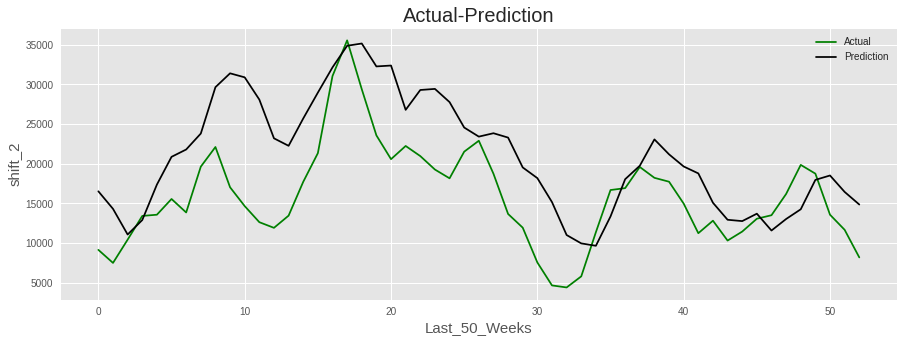

MAPE: 0.45978583756128283


In [69]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(actualVSpredicted1['Actual'],color="green",label="Actual")
plt.plot(actualVSpredicted1['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(actualVSpredicted1['Actual'].shape[0]):
    Mape.append((np.abs((actualVSpredicted1['Actual'].iloc[i] - actualVSpredicted1['Predicted'].iloc[i]) / actualVSpredicted1['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
actualVSpredicted1

In [ ]:
y_val_data[y_val_data.index=="2022-01-09"]

In [114]:
train_data = series.iloc[:int(len(series)*0.90),1:].dropna()
# val_data = series.iloc[int(len(series)*0.75):int(len(series)*0.9),1:].dropna()
# test_data = series.iloc[int(len(series)*0.9):int(len(series)*1),1:].dropna()

In [120]:
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data)

# Create sequences of length 14 for input and corresponding target feature
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i-1])
    return np.array(X), np.array(y)

sequence_length = timesteps
X, y = create_sequences(scaled_data, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
X_train[-1].shape

(17, 84)

In [127]:
y_train[-1].shape

(84,)

In [131]:
# Model architecture
model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dense(84))  # Adjust output shape based on your features
model1.compile(optimizer='adam', loss='mse')  # You can adjust loss and optimizer as needed

# Model training
model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Model evaluation
mse = model1.evaluate(X_test, y_test)
print("Mean Squared Error on test set:", mse)

Epoch 1/5
10/10 [==============================] - 2s 46ms/step - loss: 0.1076 - val_loss: 0.0834
Epoch 2/5
10/10 [==============================] - 0s 12ms/step - loss: 0.0736 - val_loss: 0.0562
Epoch 3/5
10/10 [==============================] - 0s 15ms/step - loss: 0.0498 - val_loss: 0.0353
Epoch 4/5
10/10 [==============================] - 0s 16ms/step - loss: 0.0330 - val_loss: 0.0229
Epoch 5/5
3/3 [==============================] - 0s 4ms/step - loss: 0.0252
Mean Squared Error on test set: 0.025243651121854782


In [132]:
X_test.shape

(81, 17, 84)

In [133]:
X=X_test[-1]
x=[]
X_F=[]
for i in range(10):
  
    
    pred=model1.predict(X.reshape(1,17,84))
    x.append(pred)
    
    
    X = np.vstack([X[1:],pred])
    X_F.append(X)
    

X_F=np.array(X_F)

1/1 [==============================] - 0s 23ms/step


In [113]:
# Model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(5))  # Adjust output shape based on your features
model.compile(optimizer='adam', loss='mse')  # You can adjust loss and optimizer as needed

# Model training
model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.1)

# Model evaluation
mse = model.evaluate(X_val, Y_val)
print("Mean Squared Error on test set:", mse)

Epoch 1/5


ValueError: in user code:

    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/src/losses.py", line 1608, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 5 and 84 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_4/dense_4/BiasAdd, IteratorGetNext:1)' with input shapes: [?,5], [?,84].


In [104]:
X_val[-1]

array([[0.44191432, 0.38553506, 0.59425566, ..., 0.38192934, 0.36912555,
        0.31029956],
       [0.49556156, 0.43188781, 0.5       , ..., 0.32446111, 0.31652893,
        0.32413089],
       [0.55422617, 0.54776968, 0.53398058, ..., 0.30829616, 0.28970371,
        0.38132568],
       ...,
       [0.58548823, 0.48530223, 0.42516181, ..., 0.11690542, 0.14669602,
        0.1882513 ],
       [0.48282516, 0.39904568, 0.37419094, ..., 0.12239272, 0.17558194,
        0.20374932],
       [0.43959861, 0.39904568, 0.36690939, ..., 0.12360961, 0.17955177,
        0.20449417]])

In [110]:
model.predict(X.reshape(1,17, 84))

1/1 [==============================] - 0s 24ms/step


array([[0.21986179, 0.18507828, 0.35664055, 0.24724014, 0.23760822]],
      dtype=float32)

In [111]:
Y_val

array([[0.26618739],
       [0.13877984],
       [0.10658401],
       [0.16397669],
       [0.22252422],
       [0.22549381],
       [0.26431951],
       [0.230994  ],
       [0.34408205],
       [0.39257432],
       [0.29319341],
       [0.24675637],
       [0.20706664],
       [0.19312462],
       [0.22321488],
       [0.30664049],
       [0.37740476],
       [0.56761291],
       [0.65568866],
       [0.53520737],
       [0.42126367],
       [0.36254278],
       [0.3951161 ],
       [0.37014574],
       [0.33694607],
       [0.31528924],
       [0.38104266],
       [0.40804029],
       [0.32661678],
       [0.22733933],
       [0.19355804],
       [0.10764378],
       [0.05104523],
       [0.04604836],
       [0.07340111],
       [0.18236472],
       [0.28639018],
       [0.2910487 ],
       [0.34326555],
       [0.3165084 ],
       [0.30690893],
       [0.25285495],
       [0.17986209],
       [0.21075207],
       [0.16171174],
       [0.18389705],
       [0.21559515],
       [0.224

In [108]:
X=X_val[-1]
x=[]
X_F=[]
for i in range(10):
    X=X.reshape(1,17,84)
    
    pred=model.predict(X)
    x.append(pred)
    
    
    X = np.vstack([X[1:],pred])
    X_F.append(X)
    display(X)
    

X_F=np.array(X_F)

1/1 [==============================] - 0s 25ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [93]:
X_val[-1].shape

(17, 84)

In [95]:
X[1:]

array([[0.49556156, 0.43188781, 0.5       , ..., 0.32446111, 0.31652893,
        0.32413089],
       [0.55422617, 0.54776968, 0.53398058, ..., 0.30829616, 0.28970371,
        0.38132568],
       [0.59629487, 0.54776968, 0.56674757, ..., 0.27749301, 0.26631059,
        0.35255314],
       ...,
       [0.58548823, 0.48530223, 0.42516181, ..., 0.11690542, 0.14669602,
        0.1882513 ],
       [0.48282516, 0.39904568, 0.37419094, ..., 0.12239272, 0.17558194,
        0.20374932],
       [0.43959861, 0.39904568, 0.36690939, ..., 0.12360961, 0.17955177,
        0.20449417]])

In [72]:
X_train = []
Y_train = []
X_val = []
Y_val = []

# Loop for training data
for i in range(timesteps,train.shape[0]):
    X_train.append(train[i-timesteps:i])
    Y_train.append(y_train[i-1])
X_train,Y_train = np.array(X_train),np.array(Y_train)
for i in range(timesteps,val.shape[0]):
            X_val.append(val[i-timesteps:i])
            Y_val.append(y_val[i-1])
X_val,Y_val = np.array(X_val),np.array(Y_val)

In [73]:
import numpy as np

def make_future_predictions(model, initial_input, timesteps, num_predictions):
    # Initialize an array to store future predictions
    future_predictions = []
    
    # Initialize the input sequence with the initial_input
    current_input = initial_input
    
    # Iterate for the number of predictions needed
    for _ in range(num_predictions):
        # Reshape current input to match model's input shape
        current_input = np.array(current_input).reshape(1, timesteps, -1)
        
        # Predict the next value
        next_prediction = model.predict(current_input)
        
        # Append the prediction to the list of future predictions
        future_predictions.append(next_prediction[0, 0])  # Assuming the model returns a single prediction
        
        # Update the input sequence by removing the oldest entry and appending the newest prediction
        current_input = np.append(current_input[:, 1:, :], np.tile(next_prediction, (1, 1, current_input.shape[-1])), axis=1)


    
    return future_predictions

initial_input = X_val[-1]  


future_predictions = make_future_predictions(model, initial_input, timesteps, num_predictions=4)

print(future_predictions)


1/1 [==============================] - 0s 26ms/step
[0.25062773, 0.19168894, 0.1826972, 0.10869912]


In [ ]:
#using feature  predictin  as input for forecast

In [131]:
initial_input

array([[0.44191432, 0.38553506, 0.59425566, ..., 0.38192934, 0.36912555,
        0.31029956],
       [0.49556156, 0.43188781, 0.5       , ..., 0.32446111, 0.31652893,
        0.32413089],
       [0.55422617, 0.54776968, 0.53398058, ..., 0.30829616, 0.28970371,
        0.38132568],
       ...,
       [0.58548823, 0.48530223, 0.42516181, ..., 0.11690542, 0.14669602,
        0.1882513 ],
       [0.48282516, 0.39904568, 0.37419094, ..., 0.12239272, 0.17558194,
        0.20374932],
       [0.43959861, 0.39904568, 0.36690939, ..., 0.12360961, 0.17955177,
        0.20449417]])

In [132]:
val_data.index[-1]

Timestamp('2023-01-22 00:00:00', freq='W-SUN')

In [133]:
predicted_val




array([[0.20523447],
       [0.18970756],
       [0.17597792],
       [0.189292  ],
       [0.1961149 ],
       [0.20017004],
       [0.2505317 ],
       [0.2718717 ],
       [0.35495228],
       [0.4780543 ],
       [0.48347828],
       [0.3768901 ],
       [0.23265181],
       [0.15760076],
       [0.21299724],
       [0.2750064 ],
       [0.33216074],
       [0.38106048],
       [0.45411068],
       [0.52013177],
       [0.40852743],
       [0.293814  ],
       [0.22523983],
       [0.18672678],
       [0.22400372],
       [0.28740507],
       [0.28687987],
       [0.31435812],
       [0.30708817],
       [0.26194593],
       [0.18866068],
       [0.18356948],
       [0.16936524],
       [0.17129192],
       [0.16738868],
       [0.14573394],
       [0.2309033 ],
       [0.25254315],
       [0.19354202],
       [0.18501572],
       [0.18101984],
       [0.18088813],
       [0.15549143],
       [0.1394218 ],
       [0.15516278],
       [0.18557666],
       [0.18114354],
       [0.160

In [134]:
X_train[-1]

array([[0.57661135, 0.6222389 , 0.70428803, ..., 0.75077306, 0.8578765 ,
        0.83046948],
       [0.4936318 , 0.6222389 , 0.70105178, ..., 0.68842437, 0.79567289,
        0.78316789],
       [0.4087225 , 0.55169878, 0.59749191, ..., 0.67825026, 0.76776499,
        0.74046815],
       ...,
       [0.8587418 , 0.72104868, 0.91909385, ..., 1.        , 1.        ,
        0.98508828],
       [0.87495176, 0.92029962, 0.83050162, ..., 0.86611621, 0.84183839,
        0.94731486],
       [0.86298726, 1.        , 0.79571197, ..., 0.88081251, 0.86471544,
        0.95300816]])

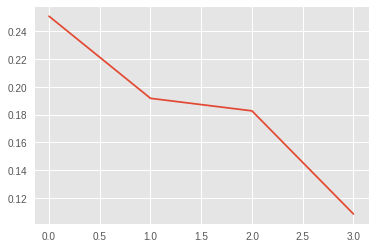

In [74]:
plt.plot(future_predictions)


In [136]:
# mse, rmse, r2_value,true,predicted, mape,bdp, ldp = evaluate_model(model,test,30)

In [75]:
future_predictions=np.array(future_predictions).reshape(-1,1)
                                                        

In [76]:
Y_tes=np.array(y_test_data).reshape(-1,1)

In [77]:
true =y_test.reshape(-1, 1)
predicted =future_predictions.reshape(-1, 1)
cols = list(series)[0:series.shape[1]]

In [78]:
df_for_training = series[cols].astype(float)
true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)

predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)

In [79]:
true_copies

array([[0.05732557, 0.05732557, 0.05732557, ..., 0.05732557, 0.05732557,
        0.05732557],
       [0.03629231, 0.03629231, 0.03629231, ..., 0.03629231, 0.03629231,
        0.03629231],
       [0.03515424, 0.03515424, 0.03515424, ..., 0.03515424, 0.03515424,
        0.03515424],
       ...,
       [0.82664195, 0.82664195, 0.82664195, ..., 0.82664195, 0.82664195,
        0.82664195],
       [0.76379102, 0.76379102, 0.76379102, ..., 0.76379102, 0.76379102,
        0.76379102],
       [0.67930005, 0.67930005, 0.67930005, ..., 0.67930005, 0.67930005,
        0.67930005]])

In [80]:
actualvalue = sc.inverse_transform(true_copies)[:4,0]
predictedvalue = sc.inverse_transform(predicted_copies)[:,0]

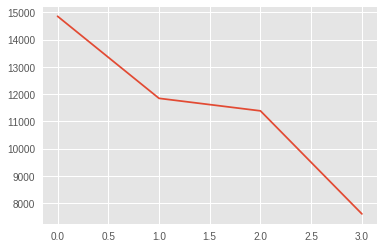

In [81]:
plt.plot(predictedvalue)

In [82]:


actualvalue = actualvalue.tolist()
predictedvalue = predictedvalue.tolist()
actualVSpredicted = pd.DataFrame(
            {'Actual': actualvalue,
             'Predicted': predictedvalue
            })

In [83]:
val_data.tail(1)

CIBCR00  CIBCR03   CIGAJ00  CIGAJ03    CIQNC00   CDANC00  \
Date                                                                     
2023-01-22  10.571429   10.661  9.471429    9.505  12.192857  8.228571   

            CDANC03    CDWCC00  CINAK03  CIQNC03  ...      2589  2590  \
Date                                              ...                   
2023-01-22    8.271  10.635714    9.997   12.611  ...  6.442857  10.5   

                8857       8858  9986      13667  5TC_CCURMON   5TC_C+1MON  \
Date                                                                         
2023-01-22  6.821429  11.828571  10.8  12.278571  9890.857143  7426.857143   

            5TC_C+2MON    5TC_CCURQ  
Date                                 
2023-01-22     10410.0  9242.428571  

[1 rows x 84 columns]

In [84]:
resultant_dfalt = test_data.reset_index(level=0)
li = resultant_dfalt['Date'][:4]
actualVSpredicted['Dates'] = pd.DataFrame({'col':li})

In [85]:
actualVSpredicted

Actual     Predicted      Dates
0  4979.857143  14855.499023 2023-01-29
1  3905.285714  11844.367188 2023-02-05
2  3847.142857  11384.987305 2023-02-12
3  2749.571429   7604.487793 2023-02-19

In [86]:
tr

NameError: name 'tr' is not defined

In [87]:
train_data.tail()

CIBCR00    CIBCR03    CIGAJ00    CIGAJ03    CIQNC00    CDANC00  \
Date                                                                           
2021-08-22  17.092857  16.667000  19.650000  19.100000  25.414286  17.707143   
2021-08-29  19.028571  16.667000  19.528571  19.100000  26.835714  17.571429   
2021-09-05  19.328571  20.383429  17.964286  20.872857  25.171429  16.107143   
2021-09-12  19.107143  21.870000  17.350000  21.582000  23.042857  15.578571   
2021-09-19  21.642857  21.870000  20.957143  21.582000  26.157143  18.857143   

            CDANC03    CDWCC00  CINAK03    CIQNC03  ...       2589       2590  \
Date                                                ...                         
2021-08-22   17.162  22.085714   20.619  24.505000  ...  17.650000  17.064286   
2021-08-29   17.162  21.428571   20.619  24.505000  ...  18.542857  19.042857   
2021-09-05   18.707  19.564286   22.539  26.280714  ...  17.100000  18.964286   
2021-09-12   19.325  19.000000   23.307  26.991000  ...  15.857143  18.242857   
2021-09-19   19.325  22.821429   23.307  26.991000  ...  17.957143  21.714286   

                 8857       8858       9986      13667   5TC_CCURMON  \
Date                                                                   
2021-08-22  15.292857  23.785714  21.921429  19.285714  41778.714286   
2021-08-29  15.264286  25.007143  21.900000  19.928571  42644.857143   
2021-09-05  13.842857  24.092857  19.921429  18.114286  41971.571429   
2021-09-12  13.457143  21.628571  19.407143  16.371429  43229.571429   
2021-09-19  16.485714  25.150000  23.685714  20.785714  48691.571429   

              5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  
Date                                                  
2021-08-22  46659.000000  41884.571429  39610.714286  
2021-08-29  46745.714286  43063.714286  39928.714286  
2021-09-05  40820.285714  36803.000000  38465.285714  
2021-09-12  41470.714286  37708.571429  38685.857143  
2021-09-19  45301.142857  40155.142857  40506.428571  

[5 rows x 84 columns]

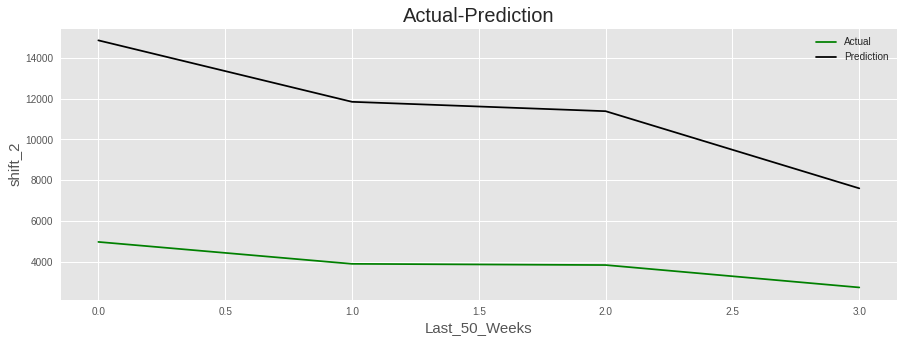

MAPE: 1.9352648087311635


In [88]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(actualVSpredicted['Actual'],color="green",label="Actual")
plt.plot(actualVSpredicted['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(actualVSpredicted['Actual'].shape[0]):
    Mape.append((np.abs((actualVSpredicted['Actual'].iloc[i] - actualVSpredicted['Predicted'].iloc[i]) / actualVSpredicted['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
X_test=[]
Y_test=[]
for i in range(timesteps,test.shape[0]):
                X_test.append(test[i-timesteps:i])
                Y_test.append(y_test[i])
X_test,Y_test = np.array(X_test),np.array(Y_test)

In [ ]:
X_test[-1].shape

In [ ]:
model.predict(X_test)

In [ ]:
test[-1]

In [ ]:

forecast = []

# Initial input for forecasting
last_sequence = test[-1] # Take the last sequence from validation data

for i in range(10):
    # Reshape the last sequence to match the model's input shape
    
    # Predict the next value
    mse, rmse, r2_value,true,predicted, mape,bdp, ldp = evaluate_model(model,X_test[-1],30)
    
    # Append the prediction to the forecast list
    forecast.append(predicted)
    
    # Update the last sequence to include the predicted value
    last_sequence = np.append(last_sequence, [predicted], axis=1)

print("Forecast for the next 10 days:", forecast)

In [ ]:
predicted = model.predict(X_test[-1])

In [ ]:
test[-1].shape

In [ ]:
X_test[-1].shape

In [ ]:

np.array(test[-1])

In [ ]:
Target=Target.reset_index()

# FBPRophet Dart


In [ ]:
Target.set_index("Date",inplace=True)

In [ ]:
Target["Date"]=pd.to_datetime(Target["Date"],dayfirst=True)

In [ ]:
Data_F=Data_F.reset_index()

In [ ]:
Data_F.head()

In [ ]:
# Data_x.reset_index(inplace=True)

# Data_cc = (Data_x.set_index('Date')
#       .reindex(pd.date_range('2015-01-01', '2024-03-01', freq='D'))
#       .rename_axis(['Date'])
#       .reset_index())

# Data_cc=Data_cc.fillna(method="ffill")

# Data_cc.set_index("Date",inplace=True)

# Data_cc=Data_cc.resample("W-SUN").mean()

# Data_cc=Data_cc.iloc[1:,:]



In [ ]:
Data_cc=Data_cc.reset_index()

In [ ]:
Data_fc=Data_F[list(set(['Date', '5TC_CCURMON', '5TC_C+1MON', '5TC_C+2MON', '5TC_C+3MON',
       '5TC_C+4MON', '5TC_C+5MON', '5TC_CCURQ', '5TC_C+1Q', '5TC_C+2Q',
       '5TC_C+3Q', '5TC_C+4Q', '5TC_C+5Q', '5TC_C+6Q', '5TC_C+1CAL',
       '5TC_C+2CAL', '5TC_C+3CAL', '5TC_C+4CAL', '5TC_C+5CAL', '5TC_C+6CAL',
       '5TC_C+7CAL'])-set(['5TC_C+5MON', '5TC_C+2Q', '5TC_C+5Q', '5TC_C+6Q', '5TC_C+3CAL', '5TC_C+4CAL', '5TC_C+5CAL', '5TC_C+6CAL', '5TC_C+7CAL']))]

In [ ]:
# Data_fc[Data_fc["Date"]<="2023-12-17"].iloc[3:-50,:]

In [ ]:
from darts import TimeSeries
future_cov_series = TimeSeries.from_dataframe(Data_fc.iloc[:-50, :], 'Date')
future_cov_seriesss = TimeSeries.from_dataframe(Data_fc.iloc[-50:, :], 'Date')


In [ ]:
Data_x.columns

In [ ]:

from darts.models import Prophet
from darts.utils.timeseries_generation import datetime_attribute_timeseries

series = TimeSeries.from_dataframe(Data_F.iloc[:-50,0:2], 'Date', 'Value')
# optionally, use some future covariates; e.g. the value of the month encoded as a sine and cosine series
#futur_cov = Data_x.iloc[:-50,:]
# adding a seasonality (daily, weekly and yearly are included by default) and holidays
model = Prophet(
    add_seasonalities={
        'name':"weekly_seasonality",
        'seasonal_periods':4,
        'fourier_order':5
        }
)
model.fit(series)
#future_cov = Data_x.iloc[-50:,:]
pred = model.predict(61)
plt.plot(pred.values())

In [ ]:
# Data_x.reset_index(inplace=True)

In [ ]:
# Data_cc = (Data_x.set_index('Date')
#       .reindex(pd.date_range('2015-01-01', '2024-03-01', freq='D'))
#       .rename_axis(['Date'])
#       .reset_index())

In [ ]:
# Data_cc=Data_cc.fillna(method="ffill")

In [ ]:
# Data_cc.set_index("Date",inplace=True)

In [ ]:
# Data_cc=Data_cc.resample("W-SUN").mean()

In [ ]:
# Data_cc=Data_cc.iloc[1:,:]

In [ ]:
# Data_cc[Data_cc.index<="2023-12-17"].iloc[3:-50,:]

In [ ]:
Data_F.iloc[:-50,:]

In [ ]:
x=pd.DataFrame()
x[["Date","Actual"]]=Data_F.iloc[-50:,:2]
x["Pred"]=pred.values().reshape(-1)

In [ ]:
x.set_index("Date",inplace=True)

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(x['Actual'],color="green",label="Actual")
plt.plot(x["Pred"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("Values",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(x['Actual'].shape[0]):
    Mape.append((np.abs((x['Actual'].iloc[i] - x['Pred'].iloc[i]) / x['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
len(future_cov_series)

In [ ]:
len(series)

In [ ]:
Data_Fi.columns

In [ ]:
Data_x.set_index("Date",inplace=True)

In [ ]:
plt.plot(Data_F.iloc[-50:,1])

In [ ]:
from darts.datasets import AirPassengersDataset
from darts.models import Prophet
from darts.utils.timeseries_generation import datetime_attribute_timeseries
series = AirPassengersDataset().load()
# optionally, use some future covariates; e.g. the value of the month encoded as a sine and cosine series
# future_cov = datetime_attribute_timeseries(series, "month", cyclic=True, add_length=6)
# adding a seasonality (daily, weekly and yearly are included by default) and holidays
model = Prophet(
    add_seasonalities={
        'name':"quarterly_seasonality",
        'seasonal_periods':4,
        'fourier_order':5
        },
)
model.fit(series,future_cov_df)
pred = model.predict(50,)
pred.values()


In [ ]:
series

In [ ]:
pip install darts


In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(actualVSpredicted['Actual'],color="green",label="Actual")
plt.plot(actualVSpredicted['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(actualVSpredicted['Actual'].shape[0]):
    Mape.append((np.abs((actualVSpredicted['Actual'].iloc[i] - actualVSpredicted['Predicted'].iloc[i]) / actualVSpredicted['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
pred_updated=[]
actual=actualVSpredicted[actualVSpredicted['Actual']!=0].Actual.values
pred=actualVSpredicted[actualVSpredicted['Actual']!=0].Predicted.values
        
difference= np.mean(actual-pred)
        
print(difference)
        
actualVSpredicted['Predicted']= actualVSpredicted['Predicted']+ difference
        
last_pred= actualVSpredicted[actualVSpredicted['Actual']!=0].Predicted.values[-1]
first_forecast= actualVSpredicted[actualVSpredicted['Actual']==0].Predicted.values[0]
        
        
first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
difference= first_forecast_updated- first_forecast
other_forecast_updated = actualVSpredicted[actualVSpredicted['Actual']==0].Predicted.values[1:] +difference
pred_updated.extend([first_forecast_updated])
pred_updated.extend(other_forecast_updated)
        
        
actualVSpredicted.Predicted[actualVSpredicted['Actual']==0]= pred_updated

In [ ]:
n_past = 10
n_days_for_prediction=90
        
train_data = series[:int(len(series)*0.9)]
val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
train_data = series[:int(len(series)*1)]
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
        
        
timesteps = 30
hl = [50,45]
lr = 1e-3
batch_size = 32
num_epochs = 100
        
X_train = []
Y_train = []

In [ ]:
for i in range(timesteps,val.shape[0]):
    X_train.append(val[i-timesteps:i])
    Y_train.append(val[i][0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [ ]:
n_days_for_prediction=90
prediction = model.predict(X_train[-n_days_for_prediction:])
cols = list(series)[0:126]
df_for_forecast = series[cols].astype(float)
prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
y_pred_future = sc.inverse_transform(prediction_copies)[:,0]        

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'Value':y_pred_future})
df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])

In [ ]:
original = pd.DataFrame()
original['actual'] = Data_F['Value']
original = original.reset_index()

In [ ]:
#original

In [ ]:
original.rename(columns={'Date':'Dates'}, inplace = True)
original['Dates'] = original['Dates'].apply(pd.to_datetime)
df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
df_forecast_orignal = df_forecast_orignal.rename(columns={'Value':'predicted'})        

In [ ]:
tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['Value'][0:]
        }))
tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')

In [ ]:
tfd['week_day']=tfd['Dates'].dt.weekday
       
tfd=tfd[~tfd['week_day'].isin([5,6])]

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(tfd['Actual'],color="green",label="Actual")
plt.plot(tfd['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(tfd['Actual'].shape[0]):
    Mape.append((np.abs((tfd['Actual'].iloc[i] - tfd['Predicted'].iloc[i]) / tfd['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
pred_updated=[]
actual=tfd[tfd['Actual']!=0].Actual.values
pred=tfd[tfd['Actual']!=0].Predicted.values
        
difference= np.mean(actual-pred)
        
print(difference)
        
tfd['Predicted']= tfd['Predicted']+ difference
        
last_pred= tfd[tfd['Actual']!=0].Predicted.values[-1]
first_forecast= tfd[tfd['Actual']==0].Predicted.values[0]
        
        
first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
difference= first_forecast_updated- first_forecast
other_forecast_updated = tfd[tfd['Actual']==0].Predicted.values[1:] +difference
pred_updated.extend([first_forecast_updated])
pred_updated.extend(other_forecast_updated)
        
        
tfd.Predicted[tfd['Actual']==0]= pred_updated

In [ ]:
n_past = 10
        n_days_for_prediction=90
        
        train_data = series[:int(len(series)*0.9)]
        val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
        train_data = series[:int(len(series)*1)]
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
        # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 32
        num_epochs = 100
        
        X_train = []
        Y_train = []
        
        
        # Loop for val data
        for i in range(timesteps,val.shape[0]):
            X_train.append(val[i-timesteps:i])
            Y_train.append(val[i][0])
        X_train,Y_train = np.array(X_train),np.array(Y_train)
        
        
        n_days_for_prediction=90
        prediction = model.predict(X_train[-n_days_for_prediction:])
        cols = list(series)[0:35]
        df_for_forecast = df[cols].astype(float)
        prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
        y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
        
        forecast_dates = []
        for time_i in predict_period_dates:
            forecast_dates.append(time_i.date())
        df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
        df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])
        
        
        original = pd.DataFrame()
        original['actual'] = df['AL_cash_settlement']
        original = original.reset_index()
        original.rename(columns={'index':'Dates'}, inplace = True)
        original['Dates'] = original['Dates'].apply(pd.to_datetime)
        df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
        df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
        df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
        df_forecast_orignal = df_forecast_orignal.rename(columns={'AL_cash_settlement':'predicted'})
        
        
        
        tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['AL_cash_settlement'][0:]
        }))
        tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')
        
        
        
        tfd['week_day']=tfd['Dates'].dt.weekday
        
        
        tfd=tfd[~tfd['week_day'].isin([5,6])]
        
        
        tfd.to_csv(r'AL_raw_preds.csv')

In [ ]:
resultant_dfalt

In [ ]:

        

        
        
        #plot_error(train_error,val_error)
        
        
        # print('MSE = {}'.format(mse))
        # print('RMSE = {}'.format(rmse))
        # print('R-Squared Score = {}'.format(r2_value))
        # print('MAPE Score = {}'.format(mape))
        # print('BDP = {}'.format(bdp))
        # print('LDP = {}'.format(ldp))
        
        #plot_data(true,predicted)
        
        true = true.reshape(-1, 1)
        predicted = predicted.reshape(-1, 1)
        cols = list(series)[0:35]
        df_for_training = df[cols].astype(float)
        true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)
        predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)
        
        
        
        actualvalue = sc.inverse_transform(true_copies)[:,0]
        predictedvalue = sc.inverse_transform(predicted_copies)[:,0]
        
        
        actualvalue = actualvalue.tolist()
        predictedvalue = predictedvalue.tolist()
        actualVSpredicted = pd.DataFrame(
            {'Actual': actualvalue,
             'Predicted': predictedvalue
            })#.to_excel('actualVSpredicted-2022-02-21.xlsx', index=False)
        resultant_dfalt = resultant_df.reset_index(level=0)
        li = resultant_dfalt['index'].tail(len(test_data)-timesteps).tolist()
        actualVSpredicted['Dates'] = pd.DataFrame({'col':li})
        
        
        
        n_past = 10
        n_days_for_prediction=90
        
        train_data = series[:int(len(series)*0.9)]
        val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
        train_data = series[:int(len(series)*1)]
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
        # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 32
        num_epochs = 100
        
        X_train = []
        Y_train = []
        
        
        # Loop for val data
        for i in range(timesteps,val.shape[0]):
            X_train.append(val[i-timesteps:i])
            Y_train.append(val[i][0])
        X_train,Y_train = np.array(X_train),np.array(Y_train)
        
        
        n_days_for_prediction=90
        prediction = model.predict(X_train[-n_days_for_prediction:])
        cols = list(series)[0:35]
        df_for_forecast = df[cols].astype(float)
        prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
        y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
        
        forecast_dates = []
        for time_i in predict_period_dates:
            forecast_dates.append(time_i.date())
        df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
        df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])
        
        
        original = pd.DataFrame()
        original['actual'] = df['AL_cash_settlement']
        original = original.reset_index()
        original.rename(columns={'index':'Dates'}, inplace = True)
        original['Dates'] = original['Dates'].apply(pd.to_datetime)
        df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
        df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
        df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
        df_forecast_orignal = df_forecast_orignal.rename(columns={'AL_cash_settlement':'predicted'})
        
        
        
        tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['AL_cash_settlement'][0:]
        }))
        tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')
        
        
        
        tfd['week_day']=tfd['Dates'].dt.weekday
        
        
        tfd=tfd[~tfd['week_day'].isin([5,6])]
        
        
        tfd.to_csv(r'AL_raw_preds.csv')
        

In [ ]:
Data_W=Data_2.resample("W-Sun").mean()

In [ ]:
Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [ ]:
Data_W.tail()

In [ ]:
#Data_new=pd.concat([Data_W,df_M],axis=1)
Data_new = Data_W

In [ ]:
Data_new.isnull().sum()

In [ ]:
Data_new

In [ ]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2014-02-24', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)

Target

Tag_f=Target.resample("W-SUN").mean()

Tag_f.isnull().sum()

In [ ]:
Tag_f.drop(['shift_30'], axis=1,inplace=True)

In [ ]:
 earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
        callbacks_list = [earlystop]
        
        #Build and train the model
       
        
        def forecast(model,train,n_days_for_forecast):
            X_train = []
            Y_train = []
        
            # Loop for training data
            for i in range(timesteps,train.shape[0]):
                X_train.append(train[i-timesteps:i])
                Y_train.append(train[i][0])
            X_train,Y_train = np.array(X_train),np.array(Y_train)
        
            n_days_for_prediction=n_days_for_forecast
            prediction = model.predict(X_train[-n_days_for_prediction:])
            prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
            y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
            forecast_dates = []
            for time_i in predict_period_dates:
                forecast_dates.append(time_i.date())
        
            df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
            df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
        #     df_forecast.to_excel('multivariate-3-RNN-forecast.xlsx')
            return df_forecast
        
        # Evaluating the model

        
        # Plotting the predictions
        def plot_data(Y_test,Y_hat):
            plt.figure(figsize = (20,7))
            plt.plot(Y_test,c = 'r')
            plt.plot(Y_hat,c = 'y')
            plt.xlabel('Day')
            plt.ylabel('Price')
            plt.title("Price Prediction using Multivatiate-RNN")
            plt.legend(['Actual','Predicted'],loc = 'lower right')
            plt.show()
        
        # Plotting the training errors
        def plot_error(train_loss,val_loss):
            plt.figure(figsize = (20,7))
            plt.plot(train_loss,c = 'r')
            plt.plot(val_loss,c = 'b')
            plt.ylabel('Loss')
            plt.xlabel('Epochs')
            plt.title('Loss Plot')
            plt.legend(['train','val'],loc = 'upper right')
            plt.show()
        
        
        
        series = df[["AL_cash_settlement","LAHCASH","LAH3MTH","LADCASH","LAD3MTH","LNA3MTH","LNACASH","LAH3MTC","LAH15MT","LAH27MT","LAD15MT","LAD3MTC","MAHCS04","BA:ALU","L:PMET","IN:NTA","G:ALU","AL_3months","EIA0007","CN:yal","CN:OSH","CN:WNG","BALTICF","CRUDOIL","OILWTIN","CRUDWTC","GSLUPRM","GSLUREG","SHGSIGL","LLCCS20","Natural_Gas","SHCNOPI","SHCNCPI"]]
        print(series.shape)
        print(series.tail())
        
        
        
        
        # Pulling the last ID count for inserting the latest index into db
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        outputID = pd.read_sql_query("select * from [PRICEPRED].[T_PP_MODEL_OUTPUT] where PMO_PARAM_ID='ALPRICEOUTPUT'",cnxn)
        cnxn.close()
        idcount = int(outputID.iloc[0].values[0])
        #idcount=10000
        
        tfd=tfd.reset_index(drop=True)
        
        
        
        
        def adjust_predictions(tfd):
                
            pred_updated=[]
            actual=tfd[tfd['Actual']!=0].Actual.values
            pred=tfd[tfd['Actual']!=0].Predicted.values
        
            difference= np.mean(actual-pred)
        
            print(difference)
        
            tfd['Predicted']= tfd['Predicted']+ difference
        
            last_pred= tfd[tfd['Actual']!=0].Predicted.values[-1]
            first_forecast= tfd[tfd['Actual']==0].Predicted.values[0]
        
        
            first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
            difference= first_forecast_updated- first_forecast
            other_forecast_updated = tfd[tfd['Actual']==0].Predicted.values[1:] +difference
            pred_updated.extend([first_forecast_updated])
            pred_updated.extend(other_forecast_updated)
        
        
            tfd.Predicted[tfd['Actual']==0]= pred_updated
        
        
            return tfd
        
        
        tfd= adjust_predictions(tfd)
        
        
        
        
        tfd=tfd[tfd['Dates']>= (dt.datetime.today()-dt.timedelta(days=180)).strftime("%Y-%m-%d") ] #### change it 
        
        
        tfd=tfd.reset_index(drop=True)
        
        
        def calculate_metrics(df):
           actual=df['Actual'].values
           pred=df['Predicted'].values
        
           #difference= np.mean(actual-pred)
        
           #print(difference)
           #pred= pred+difference
        
           mse = mean_squared_error(actual,pred)
           rmse = sqrt(mse)
           r = r2_score(actual,pred)
        
           bdp =1- np.round(np.min(np.abs(pred-actual)/ actual),2)
           ldp =1- np.round(np.max(np.abs(pred-actual)/ actual),2)
        
        
           mape = mean_absolute_percentage_error(actual,pred)
           return mse, rmse, r,  mape, bdp*100, ldp*100 #np.clip(ldp,0.7,1)*100
        
        
        
        mse, rmse, r2_value,  mape, bdp, ldp=calculate_metrics(tfd[tfd['Actual']!=0])
        
        finalDf = pd.DataFrame()
        
        finalDf['PMO_PRED_VALUE'] = tfd['Predicted']#.astype('int64')
        finalDf['PMO_OUTPUT_ID'] = np.arange(idcount+1,idcount+len(finalDf)+1).astype('int64')
        finalDf['PMO_ACT_VALUE'] = tfd['Actual']#.astype('int64')
        finalDf['PMO_PROG_RUNID'] = 1
        finalDf['PMO_STATUS'] = str('Y')
        finalDf['PMO_CRT_BY'] = str('A&I')
        finalDf['PMO_CRT_ON'] = (dt.datetime.today()).strftime('%Y-%m-%d')
        finalDf['Commodity'] = str('Aluminium')
        finalDf['MAPE'] = mape
        finalDf['r2score'] = np.clip(r2_value, 0.5, 1.0)
        finalDf['MSE'] = mse
        finalDf['RMSE'] = rmse
        finalDf['BDP'] = bdp
        finalDf['LDP'] =ldp
        finalDf['PMO_PRED_YEAR'] = tfd['Dates'].dt.isocalendar().year
        finalDf['PMO_PARAM_ID'] = str('ALPRICEOUTPUT')
        finalDf['PMO_PRED_MONTH'] = tfd['Dates'].dt.month
        finalDf['PMO_PRED_WEEKNO'] = tfd['Dates'].dt.isocalendar().week
        finalDf['PMO_PRED_STARTDT'] = pd. DatetimeIndex(tfd['Dates'])
        finalDf['PMO_PRED_ENDDT'] = pd. DatetimeIndex(tfd['Dates'])
        
        
        finalDf['PMO_PRED_STARTDT'] = pd.to_datetime(finalDf['PMO_PRED_STARTDT']).dt.strftime('%Y-%m-%d')
        finalDf['PMO_PRED_ENDDT'] = pd.to_datetime(finalDf['PMO_PRED_ENDDT']).dt.strftime('%Y-%m-%d')
        finalDf['PMO_CRT_ON'] = pd.to_datetime(finalDf['PMO_CRT_ON']).dt.strftime('%Y-%m-%d')
        #finalDf['PMO_UPD_ON'] = pd.to_datetime(finalDf['PMO_UPD_ON']).dt.strftime('%Y-%m-%d')
        
        finalDf['PMO_PRED_VALUE'] = finalDf['PMO_PRED_VALUE'].round(decimals = 2)
        finalDf['PMO_ACT_VALUE'] = finalDf['PMO_ACT_VALUE'].round(decimals = 2)
        finalDf['MAPE'] = finalDf['MAPE'].round(decimals = 2)
        finalDf['r2score'] = finalDf['r2score'].round(decimals = 2)
        finalDf['MSE'] = finalDf['MSE'].round(decimals = 2)
        finalDf['RMSE'] = finalDf['RMSE'].round(decimals = 2)
        finalDf['PMO_PRED_YEAR']= finalDf['PMO_PRED_YEAR'].astype(int)
        finalDf['PMO_PRED_WEEKNO']= finalDf['PMO_PRED_WEEKNO'].astype(int)
        
        finalDf.to_csv("AL_predfinal.csv",index=False)
        
        
        
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        cursor = cnxn.cursor()
        
        outputID = cursor.execute("DELETE FROM [PRICEPRED].[T_PP_MODEL_OUTPUT] WHERE PMO_PARAM_ID='ALPRICEOUTPUT'")
        cnxn.commit()
        cnxn.close()
        
        
        
        try:
            # server = '10.136.218.70'
            # database = 'PROCPRICEPRED'
            # username = 'PRICEPRED'
            # password = '590_Prafulla;'
            cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        
            print(cnxn)
            cursor = cnxn.cursor()
            for row in finalDf.itertuples():
                cursor.execute('''
                             INSERT INTO [PRICEPRED].[T_PP_MODEL_OUTPUT]([PMO_OUTPUT_ID],[PMO_PARAM_ID],[PMO_PRED_YEAR],[PMO_PRED_MONTH],[PMO_PRED_WEEKNO],[PMO_PRED_STARTDT],[PMO_PRED_ENDDT],[PMO_PRED_VALUE],[PMO_ACT_VALUE],[PMO_PROG_RUNID],[PMO_STATUS],[PMO_CRT_BY],[PMO_CRT_ON],[Commodity],[MAPE],[r2score],[MSE],[RMSE],[BDP],[LDP]) 
                             VALUES
                             (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
                             ''',
                             row.PMO_OUTPUT_ID,row.PMO_PARAM_ID,row.PMO_PRED_YEAR,row.PMO_PRED_MONTH,row.PMO_PRED_WEEKNO,row.PMO_PRED_STARTDT,row.PMO_PRED_ENDDT,row.PMO_PRED_VALUE,row.PMO_ACT_VALUE,row.PMO_PROG_RUNID,row.PMO_STATUS,row.PMO_CRT_BY,row.PMO_CRT_ON,row.Commodity,row.MAPE,row.r2score,row.MSE,row.RMSE,row.BDP,row.LDP
                             )
            cnxn.commit()
            cursor.close()
            cnxn.close()
            print('Prediction insertion done!')
        except Exception as e:
            print(e)
            print('Failed to insert predictions')
            
            
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        outputID = pd.DataFrame()
        outputID['Date'] = pd.read_sql_query("select MAX(PPV_DATE) from [PRICEPRED].[T_PP_PARAM_VAL] where PPV_PARAM_ID='AL_cash_settlement_REF'",cnxn)
        cnxn.close()
        # idcount = int(outputID.iloc[0].values[0])
        max_dt = (outputID['Date']).to_string(index=False)
        print(max_dt)
        
        input_df2=resultant_df.reset_index()
        input_df2=input_df2[input_df2['index']>max_dt]
        
        if len(input_df2)>0:
            df = input_df2[['index','LAHCASH', 'LAH3MTH', 'LADCASH', 'LAD3MTH', 'LNA3MTH',
               'LNACASH', 'LAH3MTC', 'LAH15MT', 'LAH27MT', 'LAD15MT', 'LAD3MTC',
               'MAHCS04', 'BA:ALU', 'L:PMET', 'IN:NTA', 'G:ALU', 'EIA0007', 'CN:yal',
               'CN:OSH', 'CN:WNG', 'BALTICF', 'CRUDOIL', 'OILWTIN', 'CRUDWTC',
               'GSLUPRM', 'GSLUREG', 'SHGSIGL', 'LLCCS20', 'SHCNOPI', 'SHCNCPI',
               'AL_cash_settlement', 'AL_3months', 'Natural_Gas']]
            df=df.rename({'AL_cash_settlement':'_cash_settlement_REF', 'AL_3months':'_3months_REF','Natural_Gas':'Natural_Gas_REF'},axis=1)
            df_new = pd.DataFrame()
            variables = list(df.columns)
            variables.remove('index')
            for idx, val in df.iterrows():
                for var in variables:
                    df_new = df_new.append({
                        'Dates': val['index'],
                        'Variable': var,
                        'Value': val[var]
                    }, ignore_index = True)
        
        
            InputDf = pd.DataFrame()
        
            InputDf['PPV_YEAR'] = pd.to_datetime(df_new['Dates']).dt.year
            InputDf['PPV_MONTH_NO'] = pd.to_datetime(df_new['Dates']).dt.month
            InputDf['PPV_WEEK_NO'] = pd.to_datetime(df_new['Dates']).dt.isocalendar().week
            InputDf['PPV_DATE'] = pd.to_datetime(df_new['Dates'])
        
            InputDf['PPV_PARAM_ID'] ='AL'+ df_new['Variable']
            InputDf['PPV_PARAM_VAL'] = df_new['Value']
            InputDf['PPV_STATUS'] = str('Y')
            InputDf['PPV_CRT_BY'] = str('A&I')
            InputDf['PPV_CRT_ON'] = dt.date.today()
            InputDf['PPV_WEEK_NO']=InputDf['PPV_WEEK_NO'].astype(int)
            InputDf['PPV_DATE']=pd.to_datetime(InputDf['PPV_DATE']).dt.strftime("%Y-%m-%d")
            InputDf['PPV_CRT_ON']=pd.to_datetime(InputDf['PPV_CRT_ON']).dt.strftime("%Y-%m-%d")
        
            InputDf=InputDf[~InputDf['PPV_PARAM_VAL'].isna()]
        
            InputDf.to_csv("Input_df.csv")
        
        
        
            try:
                # server = '10.136.218.70'
                # database = 'PROCPRICEPRED'
                # username = 'PRICEPRED'
                # password = '590_Prafulla;'
                cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        
                print(cnxn)
                cursor = cnxn.cursor()
                for row in InputDf.itertuples():
                    print(row)
                    cursor.execute('''
                                 INSERT INTO [PRICEPRED].[T_PP_PARAM_VAL]([PPV_YEAR],[PPV_MONTH_NO],[PPV_WEEK_NO],[PPV_DATE],[PPV_PARAM_ID],[PPV_PARAM_VAL],[PPV_STATUS],[PPV_CRT_BY],[PPV_CRT_ON]) 
                                 VALUES
                                 (?,?,?,?,?,?,?,?,?)
                                 ''',
                                 row.PPV_YEAR,row.PPV_MONTH_NO,row.PPV_WEEK_NO,row.PPV_DATE,row.PPV_PARAM_ID,row.PPV_PARAM_VAL,row.PPV_STATUS,row.PPV_CRT_BY,row.PPV_CRT_ON
                                 )
                cnxn.commit()
                cursor.close()
                cnxn.close()
                print("insertion complete")
            except Exception as e:
                print(e)
                cursor.close()
                cnxn.close()
                print("Input Insertion failed!")
                print('---')
        
        print("Model Run Complete")
        
    except Exception as e:
        print(e)
        print("Model run failed!")
        


In [ ]:
Tag_f.fillna(method="ffill",inplace=True)

In [ ]:
Tag_f=Tag_f.iloc[1:,:]

In [ ]:
Tag_f

In [ ]:
Tag_f["shift_4"]=Tag_f["Value"].shift(-4)

In [ ]:
Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [ ]:
cor={}
for i in range(len(Data_Fin.columns)):   
    cor[Data_Fin.columns[i]]=Data_Fin["Value"].corr(Data_Fin.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>.7}
len(Imp_f)

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
keys

In [ ]:
Data_new.fillna(method="ffill")

In [ ]:
Final=pd.concat([Data_new,Tag_f[['Value', 'shift_2',
 'Value_fshift_3',
 'Value_fshift_7',
 'Value_fshift_14',
 'Value_rollm_3',
 'Value_rollm_7',
 'Value_rollm_14',
 'Value_rollm_21',
 'Value_rollm_28',
 'Value_rollm_35',
 'Value_rollm_42',
 'Value_rollm_49',
 'Value_rollm_54',
 'Value_rollm_63',
 'Value_ewm_3',
 'Value_ewm_7',
 'Value_ewm_14',
 'Value_ewm_21',
 'Value_ewm_28',
 'Value_ewm_35',
 'Value_ewm_42',
 'Value_ewm_49',
 'Value_ewm_54',
 'EMA_Diff_28_14_7',
 'EMA_Diff_35_21_14',
 'EMA_Diff_49_28_21',
 'EMA_Diff_70_35_21',
 'EMA_Diff_100_54_35',
 'EMA_Diff_100_54_42',
 'EMA_Diff_120_63_49',
 'EMA_Diff_120_63_42',
 'EMA_Diff_150_70_54',
 'EMA_Value_ewm_3-Value_ewm_70',
 'EMA_Value_ewm_3-Value_ewm_90',
 'EMA_Value_ewm_3-Value_ewm_100',
 'EMA_Value_ewm_3-Value_ewm_120',
 'EMA_Value_ewm_3-Value_ewm_150',
 'EMA_Value_ewm_3-Value_ewm_180',
 'EMA_Value_ewm_3-Value_ewm_210',
 'EMA_Value_ewm_14-Value_ewm_90',
 'EMA_Value_ewm_14-Value_ewm_100',
 'EMA_Value_ewm_14-Value_ewm_120',
 'EMA_Value_ewm_14-Value_ewm_150',
 'EMA_Value_ewm_14-Value_ewm_180',
 'EMA_Value_ewm_14-Value_ewm_210',
 'EMA_Value_ewm_28-Value_ewm_150',
 'EMA_Value_ewm_28-Value_ewm_180',
 'EMA_Value_ewm_28-Value_ewm_210',
 'EMA_Value_ewm_100-Value_ewm_7',
 'EMA_Value_ewm_100-Value_ewm_21',
 'EMA_Value_ewm_150-Value_ewm_7',
 'EMA_Value_ewm_150-Value_ewm_21',
 'EMA_Value_ewm_210-Value_ewm_7',
 'EMA_Value_ewm_210-Value_ewm_21',]]],axis=1)

In [ ]:
Final.isnull().sum()

In [ ]:
Data_f=Final.iloc[1:-4,:]

In [ ]:
Data_f.isnull().sum()

In [ ]:
Data_f.dropna(axis=1,inplace=True)

In [ ]:
Data_f.shape

In [ ]:
f_c=list(Data_f.columns)

In [ ]:
f_c.remove("shift_2")

In [ ]:
f_c[-10:]

In [ ]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_2"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [ ]:
Data_f.shape

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>.6}
len(Imp_f)

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
sorted_dict

In [ ]:
keys

In [ ]:
Data_F=Data_Fin[keys]

In [ ]:
Data_f.shape

In [ ]:
f_c=list(Data_f.columns)

f_c.remove("shift_2")

In [ ]:
len(f_c)

In [ ]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [ ]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [ ]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [ ]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [ ]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [ ]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

In [ ]:
Data_f.reset_index(inplace=True)

In [ ]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [ ]:
Data_f.head()

In [ ]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [ ]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [ ]:
Data_f.set_index("Date",inplace=True)

In [ ]:
Data_f=Data_f.iloc[8:,:]

In [ ]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [ ]:
Data_f.fillna(method="ffill",inplace=True)

In [ ]:
Data_f.isnull().sum()

In [ ]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_2"].corr(Data_f.iloc[:,i])

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>=.65}
len(Imp_f)

In [ ]:
#Tag_f["Value"].corr(Final['CapeOI010118'])

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
sorted_dict

In [ ]:
X_Final=Data_f[keys]

In [ ]:
X_Final.fillna(method="ffill",inplace=True)

In [ ]:
X_Final.shape

In [ ]:
X_Final.tail()

In [ ]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [ ]:
X_Final.shape

In [ ]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [ ]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [ ]:
X_Final.fillna(method="ffill",inplace=True)

In [ ]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

In [ ]:
X_Final.drop('shift_2',axis=1,inplace=True)

In [ ]:
Tag_f.head

In [ ]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [ ]:
X_Final.dropna(thresh=204,axis=1,inplace=True)

In [ ]:
X_Final["UCOEXOT_ewm_6"].tail(10)

In [ ]:
X_Final.drop(['Value'], axis=1, inplace=True)

In [ ]:
X_Final['Value']

In [ ]:
exp_reg102 = setup(data =X_Final.iloc[:X_Final.shape[0]-50,:], target = 'shift_2', session_id=124,normalize=True,remove_multicollinearity=True,multicollinearity_threshold=.98) 

In [ ]:
X_Final.isnull().sum()

In [ ]:
postdf=get_config('X_transformed')

In [ ]:
postdf.columns

In [ ]:
postdf.columns

In [ ]:
compare_models()

In [ ]:
par=create_model("et")

In [ ]:
et = tune_model(par, optimize='MAPE')

In [ ]:
Mod1=finalize_model(par)

pred2 = predict_model(Mod1, data=X_Final.iloc[X_Final.shape[0]-50:,:])

In [ ]:
Res=pred2.iloc[:,-2:]

Res["diff"]=Res["shift_2"]-Res["prediction_label"]
Res["diff1_V"]=Res["shift_2"].diff(4)

Res["diff1_P"]=Res["prediction_label"].diff(4)

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_2_Weeks",fontdict=font1)
plt.plot(Res["shift_2"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_2"].shape[0]):
    Mape.append((np.abs((Res["shift_2"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_2"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
Res.tail()

In [ ]:
Tag_f.Value.values[-54:-4]

In [ ]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [ ]:
directional_acc(Res["prediction_label"],Res["shift_2"],Tag_f.Value.values[-54:-4])

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_25_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
plt.plot(Res["shift_4"])

In [ ]:
Tag_f

In [ ]:
Res["Value"]=Tag_f["Value"].iloc[-50:]

In [ ]:
Tag_f["Value"].iloc[-54:]

In [ ]:
Res["Value"]=Tag_f["Value"].iloc[-54:]

In [ ]:
Res

In [ ]:
Res.to_csv("4_shift_reg_Cape_with_Targ.csv")

In [ ]:
X_fin